<a href="https://colab.research.google.com/github/aldrinlijo04/basic-nn-model/blob/main/exp01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('exp1').sheet1
rows = worksheet.get_all_values()
df = pd.DataFrame(rows[1:], columns=rows[0])

In [ ]:
df.head()

,Input 1 (Number),Output
0,13,0.785
1,42,1.823
2,7,0.427
3,8,1.102
4,10,0.927


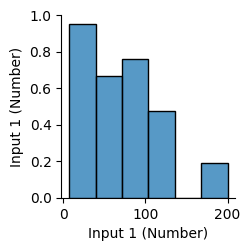

In [ ]:
import pandas as pd
import seaborn as sns
df['Input 1 (Number)'] = pd.to_numeric(df['Input 1 (Number)'])
sns.pairplot(df)


In [ ]:
df['Input 1 (Number)'] = pd.to_numeric(df['Input 1 (Number)'])
df['Output'] = pd.to_numeric(df['Output'])

In [ ]:
df.columns

Index(['Input 1 (Number)', 'Output'], dtype='object')

In [ ]:
X = df['Input 1 (Number)']
y=df['Output']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
M = MinMaxScaler()
x_train = M.fit_transform(x_train)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
model = Sequential()
model.add(Dense(15,activation='relu',input_shape=x_train.shape))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 25, 15)            30        
                                                                 
 dense_7 (Dense)             (None, 25, 10)            160       
                                                                 
 dense_8 (Dense)             (None, 25, 1)             11        
                                                                 
Total params: 201 (804.00 Byte)
Trainable params: 201 (804.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',loss='mse')

In [ ]:
model.fit(x_train,y_train,epochs=80)

Epoch 1/80
1/1 [==============================] - 1s 706ms/step - loss: 1.5975
Epoch 2/80
1/1 [==============================] - 0s 9ms/step - loss: 1.5477
Epoch 3/80
1/1 [==============================] - 0s 11ms/step - loss: 1.5147
Epoch 4/80
1/1 [==============================] - 0s 10ms/step - loss: 1.4894
Epoch 5/80
1/1 [==============================] - 0s 9ms/step - loss: 1.4685
Epoch 6/80
1/1 [==============================] - 0s 10ms/step - loss: 1.4498
Epoch 7/80
1/1 [==============================] - 0s 10ms/step - loss: 1.4333
Epoch 8/80
1/1 [==============================] - 0s 11ms/step - loss: 1.4187
Epoch 9/80
1/1 [==============================] - 0s 11ms/step - loss: 1.4057
Epoch 10/80
1/1 [==============================] - 0s 9ms/step - loss: 1.3934
Epoch 11/80
1/1 [==============================] - 0s 10ms/step - loss: 1.3827
Epoch 12/80
1/1 [==============================] - 0s 10ms/step - loss: 1.3711
Epoch 13/80
1/1 [==============================] - 0s 12ms/step

In [ ]:
model.history

In [ ]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

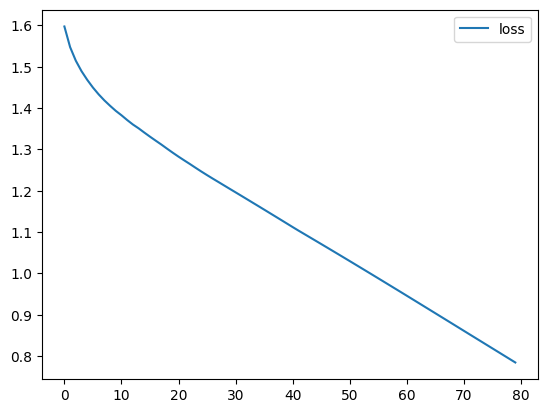

In [ ]:
loss_df.plot()

In [ ]:
y_pred=model.predict(x_test)

1/1 [==============================] - 0s 215ms/step


In [ ]:
y_pred

array([[[41.922314]],

       [[20.96608 ]],

       [[34.824234]],

       [[24.684122]],

       [[10.825964]],

       [[11.839975]],

       [[67.272606]]], dtype=float32)